In [1]:
from roulette import Roulette
from core import plot_money_history, gain_at_some_point
import matplotlib.pyplot as plt  # type: ignore
roulette = Roulette()

# Calculating the expected values depending on the number of selcted numbers

In [2]:
expected_values = []
bet_amount = 100
max_bets = 35
for num_betting_fields in range(1, max_bets):
    coef = Roulette.get_bet_coefficient(num_betting_fields)
    prob_positive = num_betting_fields/37
    prob_negative = (37 - num_betting_fields)/37
    positive_part = bet_amount*(coef)
    negative_part = -bet_amount
    ex = prob_positive * positive_part + prob_negative * negative_part
    expected_values.append(ex)


## Plotting the expected values

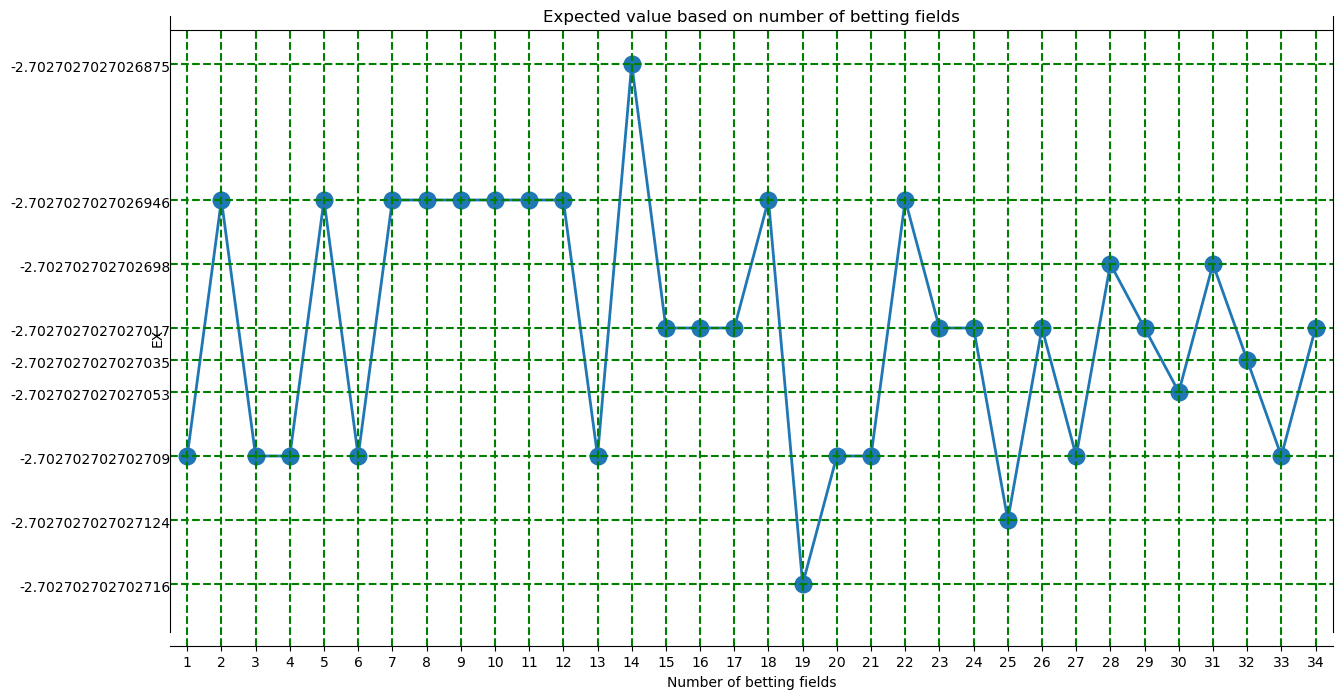

In [3]:
# Set the figsize to control the dimensions of the image
all_possible_points = range(1, max_bets)
plt.figure(figsize=(15, 8))

plt.plot(all_possible_points, expected_values, marker='o', linestyle='-', linewidth=2, markersize=12)

plt.xlabel('Number of betting fields')
plt.ylabel('EX')

plt.title("Expected value based on number of betting fields")

plt.xlim(0.5, max_bets -0.5)  # Set the y-axis range
epsilon = (max(expected_values) - min(expected_values)) / 10
plt.ylim(min(expected_values) - epsilon, max(expected_values) + epsilon)  # Set the y-axis range

# Set custom ticks on the x-axis and remove ticks from the y-axis
plt.xticks(all_possible_points)
plt.yticks([])

horizontal_lines = set(expected_values)
for line in horizontal_lines:
    plt.axhline(y=line, color='green', linestyle='--', label=f'Line at {line}')
    plt.text(0.5, line, f'{line}', color='black', ha='right', va='center')

for i, ex in enumerate(expected_values):
    plt.axvline(x=i+1, color='green', linestyle='--', label=f'Line at {i+1}')

plt.show()

From this we gather that in order to maximise the expected value one should always bet on 14 numbers, while voting on 19 numbers is the worst strategy. But the difference is so marginal that when you are betting with $100 you won't notice the difference since the difference in the expected values is less than a cent.